In [1]:
import os
import requests
from pathlib import Path
import numpy as np
import pandas as pd
from websocket import create_connection
import simplejson as json
from dotenv import load_dotenv
from alpaca_trade_api.rest import REST, TimeFrame
import pprint

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
base_url = 'https://paper-api.alpaca.markets'

In [4]:
api = REST(alpaca_api_key, alpaca_secret_key, base_url, api_version="v1")

Websocket:

In [ ]:
url = 'wss://stream.data.alpaca.markets/v1beta1/crypto'
ws = create_connection(url)

Live Price:

In [24]:
import alpaca_trade_api
api = alpaca_trade_api.REST(key_id=alpaca_api_key, secret_key=alpaca_secret_key)

# Today's bars
bars = api.get_crypto_bars("BTCUSD", "1Min")

# set crypto and exchange
cc = 'ETHUSD'
exchange = 'CBSE'

# Latest price
latest_price = api.get_latest_crypto_trade(f"{cc}", f"{exchange}").price
print(f'the current price of {cc} is ${latest_price}')

the current price of ETHUSD is $1567.58


Backtesting:

In [5]:
# Fetch 1hour historical bars of ETH
bars = api.get_crypto_bars("ETHUSD", TimeFrame.Hour).df
bars.tail()


,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2023-01-16 23:00:00+00:00,CBSE,1579.31,1582.89,1572.60,1576.96,10577.376387,17689,1578.210851
2023-01-16 23:00:00+00:00,ERSX,1579.61,1582.99,1573.30,1576.39,934.541541,446,1578.299155
2023-01-17 00:00:00+00:00,BNCU,1576.46,1581.46,1561.75,1563.50,4556.908580,3479,1572.143337
2023-01-17 00:00:00+00:00,CBSE,1577.01,1582.50,1558.90,1564.52,16694.850209,25050,1571.938007
2023-01-17 00:00:00+00:00,ERSX,1573.68,1582.57,1559.70,1564.86,1178.782521,170,1573.660785


In [6]:
# Filter data by exchange (coinbase)
bars = bars[bars.exchange == 'CBSE']
display(bars.head())
display(bars.tail())

,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2023-01-16 06:00:00+00:00,CBSE,1576.44,1579.30,1569.73,1571.49,11996.189254,19977,1573.825871
2023-01-16 07:00:00+00:00,CBSE,1571.65,1571.99,1563.21,1566.71,10822.723580,22755,1567.314122
2023-01-16 08:00:00+00:00,CBSE,1566.62,1567.18,1522.35,1538.15,29535.121679,33543,1541.379441
2023-01-16 09:00:00+00:00,CBSE,1538.39,1546.37,1536.68,1544.89,9714.360704,16832,1542.307653
2023-01-16 10:00:00+00:00,CBSE,1544.84,1553.64,1544.53,1547.31,8951.748037,16741,1547.825028


,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2023-01-16 20:00:00+00:00,CBSE,1591.01,1599.29,1584.00,1587.19,16543.625117,27943,1589.942019
2023-01-16 21:00:00+00:00,CBSE,1587.19,1587.90,1573.76,1579.37,13112.092501,22612,1580.431202
2023-01-16 22:00:00+00:00,CBSE,1579.34,1585.99,1578.12,1579.41,7429.443971,15027,1582.115755
2023-01-16 23:00:00+00:00,CBSE,1579.31,1582.89,1572.60,1576.96,10577.376387,17689,1578.210851
2023-01-17 00:00:00+00:00,CBSE,1577.01,1582.50,1558.90,1564.52,16694.850209,25050,1571.938007


<AxesSubplot:xlabel='timestamp'>

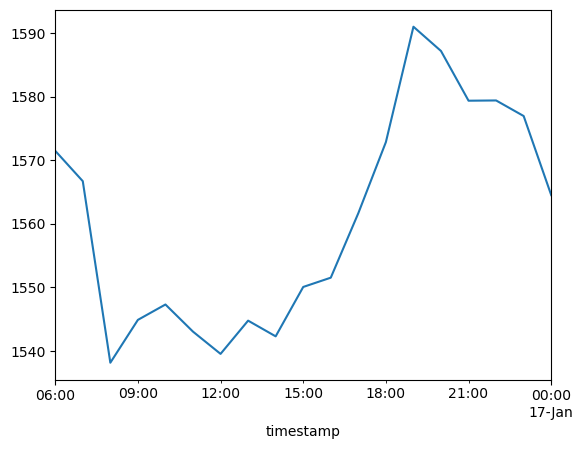

In [8]:
bars['close'].plot()

In [ ]:
# Get current position on ETH. Yields error if we don't hold any
api.get_position('ETH')

# Get all positions and find out if we hold any Bitcoin
positions = api.list_positions()
position_qty = 0
for p in positions:
    if p.symbol == 'ETHUSD':
        position_qty = float(p.qty)
print(position_qty)

In [ ]:
# market order to buy 1 ETH
# order_buy = api.submit_order('ETHUSD', qty=1, side='buy')

In [ ]:
# market order to sell 1 ETH
# order_sell = api.submit_order('ETHUSD', qty=1, side='sell')

In [ ]:
# machine learning imports
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report